MMSegmentation은 다양한 실험을 하기 쉽게 system에 모듈형 상속 디자인을 system에 포함시켰다고 한다. <br>
만약 config file을 점검해보고 싶다면 **python tools/print_config.py /PATH/TO/CONFIG**를 실행시켜 보라고 한다.

<strong> <h3> Config File Structure </h3> </strong>

**config/base**폴더 안에는 dataset, model, schedule, defualt_runtime.py 총 4개의 기본 요소가 존재한다. <br>
많은 방식들은 DeepLabV3, PSPNet과 같은 것들 중 하나로 쉽게 구성될 수 있다. <br>
이때 base의 구성 요소들로 구성된 config들을 primitive라고 불린다.

같은 폴더 안에있는 모든 config들은 오직 하나의 primitive를 가지도록 권장된다. <br>
모든 다른 config들은 primitive config로부터 상속받아야 한다. <br>
위 방식에 따라, 최대 상속 level은 3이 최대다.

쉬운 이해를 위해, 계발자들은 존재하는 방식들로 부터 상속받는 것을 권장한다고 한다. <br>
예를 들어, 만약 몇 가지 수정이 DeepLabV3 base에서 수행되었다면, 사용자는 처음에 기본 DeepLabV3 structure를 아래 명령으로 상속 받을 것이다. 
> _base_ = ../deeplabv3/deeplabv3_r50_512x1024_40ki_cityscapes.py

그리고 config 파일들의 필요한 영역을 수정한다.

만약 존재하지 않는 새로운 방식을 사용해야 한다면 configs 아래에 xxxnet folder를 만들어줘야 한다.

자세한 내용은 상세한 document이 [mmcv](https://mmcv.readthedocs.io/en/latest/understand_mmcv/config.html)를 참고하라고 한다.

<strong> <h3> Config Name Style </h3> </strong>

config file들은 아래 스타일의 이름을 따라야 한다. 
```
{model}_{backbone}_[misc]_[gpu x batch_per_gpu]_{resolution}_{iterations}_{dataset}
```
* {model}: psp, deeplabv3 등 모델 종류를 의미한다.
* {backbone}: r50(ResNet-50), x101(ResNeXt-101)과 같은 backbone 종류를 의미한다.
* [misc]: dconv, gcb, attention 등 다양한 모델의 setting/plugins를 의미한다.
* [gpu x batch_per_gpu]: GPU들과 각 GPU의 sample들을 의미한다. default는 8×2다.
* {iterations}: 160k와 같이 훈련 iteration 횟수를 말한다.
* {dataset}: cityscapes, voc12aug등 dataset을 의미한다.

<strong> <h3> Example of Using Config </h3> </strong>

/opt/ml/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:232: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


load checkpoint from local path: ../../../mmsegmentation/checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth


/opt/ml/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


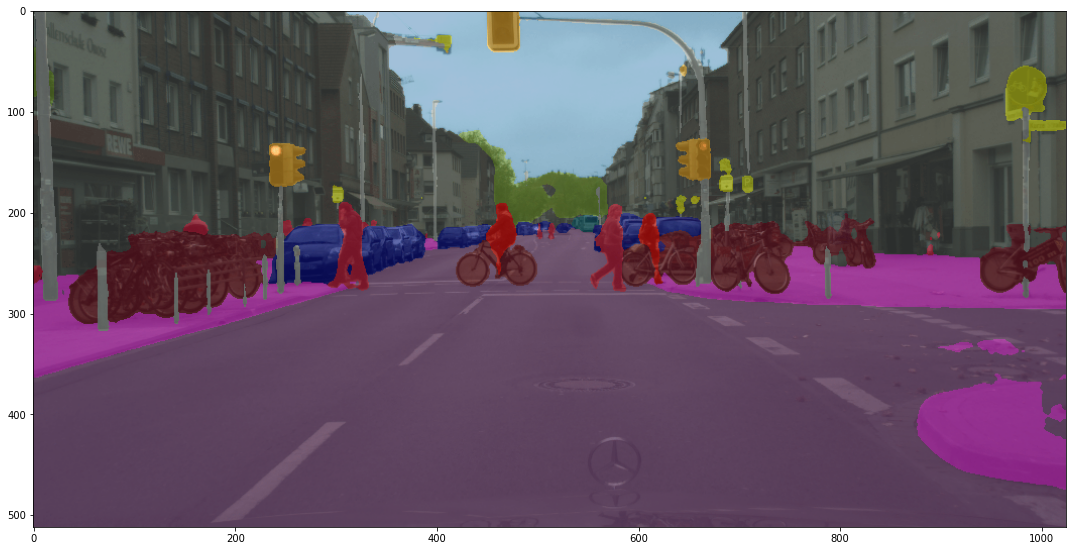

In [2]:
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

config_file = '../../../mmsegmentation/configs/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes.py'  # 위에서 설명한 이름 형식을 따른다.
checkpoint_file = '../../../mmsegmentation/checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'

# build the model from a config file and a checkpoint file (config file과 미리 학습된 가중치를 가지고 model을 선언한다.)
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

# test a single image
img = '../../../mmsegmentation/demo/demo.png'
result = inference_segmentor(model, img)    # model과 추론하려는 이미지를 넘겨 결과를 가져온다.

# show the results
show_result_pyplot(model, img, result, get_palette('cityscapes')) # 결과를 출력한다.